In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import boto3

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
my_region = boto3.session.Session().region_name
print(f"My region is: {my_region}")

s3 = boto3.client('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_access_key)

My region is: eu-west-2


In [3]:
bucket_name = 'cardio-prediction-bucket'
csv_file = 'cardio_train.csv'

obj = s3.get_object(Bucket = bucket_name, Key = csv_file)
df_cardio = pd.read_csv(obj['Body'], sep = ';')

In [4]:
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df_cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Perform exploratory data analysis

In [6]:
df_cardio = df_cardio.drop(columns = ['id'])

In [7]:
df_cardio['age'] = df_cardio['age']/365

In [8]:
df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
df_cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [11]:
df_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df_older = df_cardio[df_cardio['age'] > 64.8]

## Visualise the dataset

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

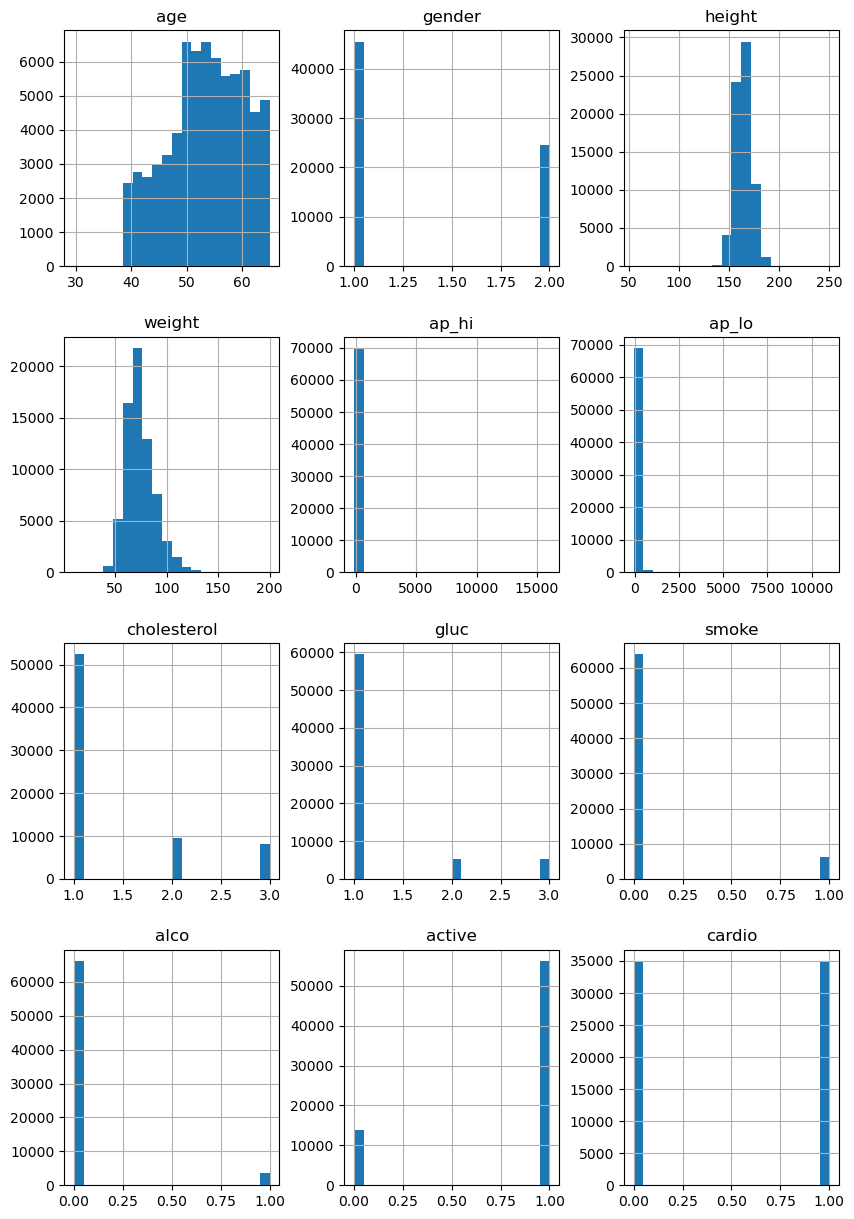

In [13]:
df_cardio.hist(bins = 20, figsize = (10, 15))

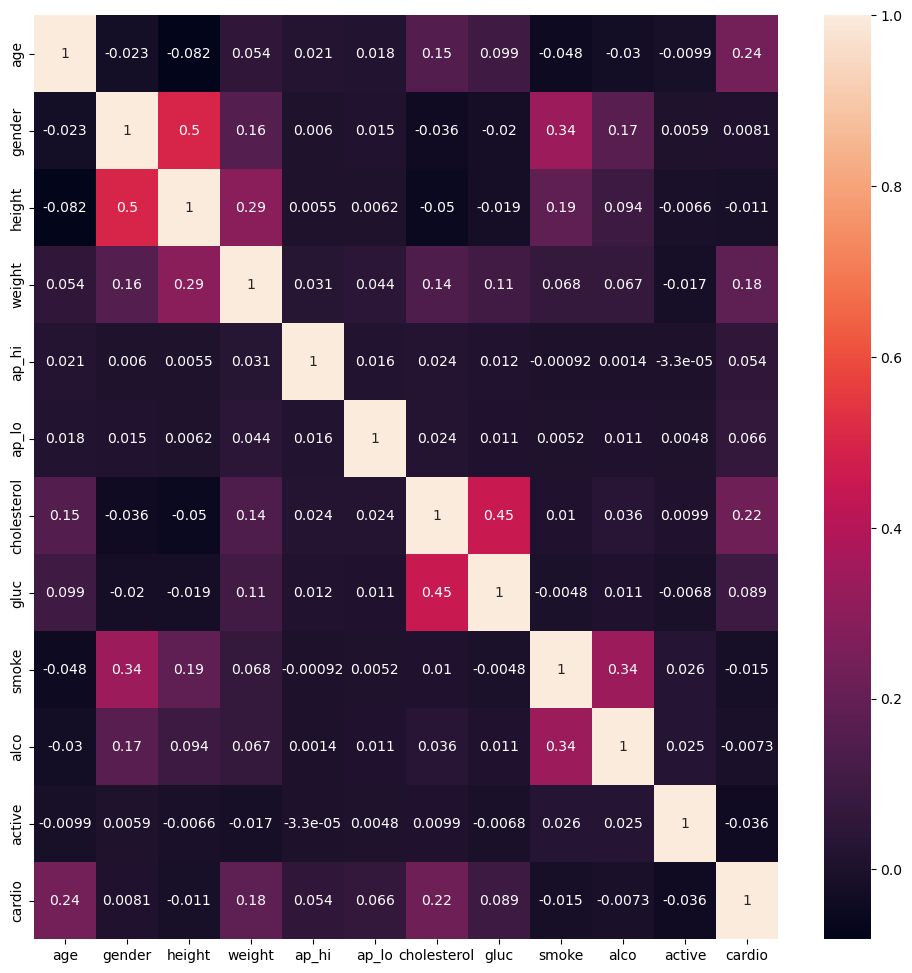

In [14]:
correlation_matrix = df_cardio.corr()

plt.figure(figsize = (12, 12))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

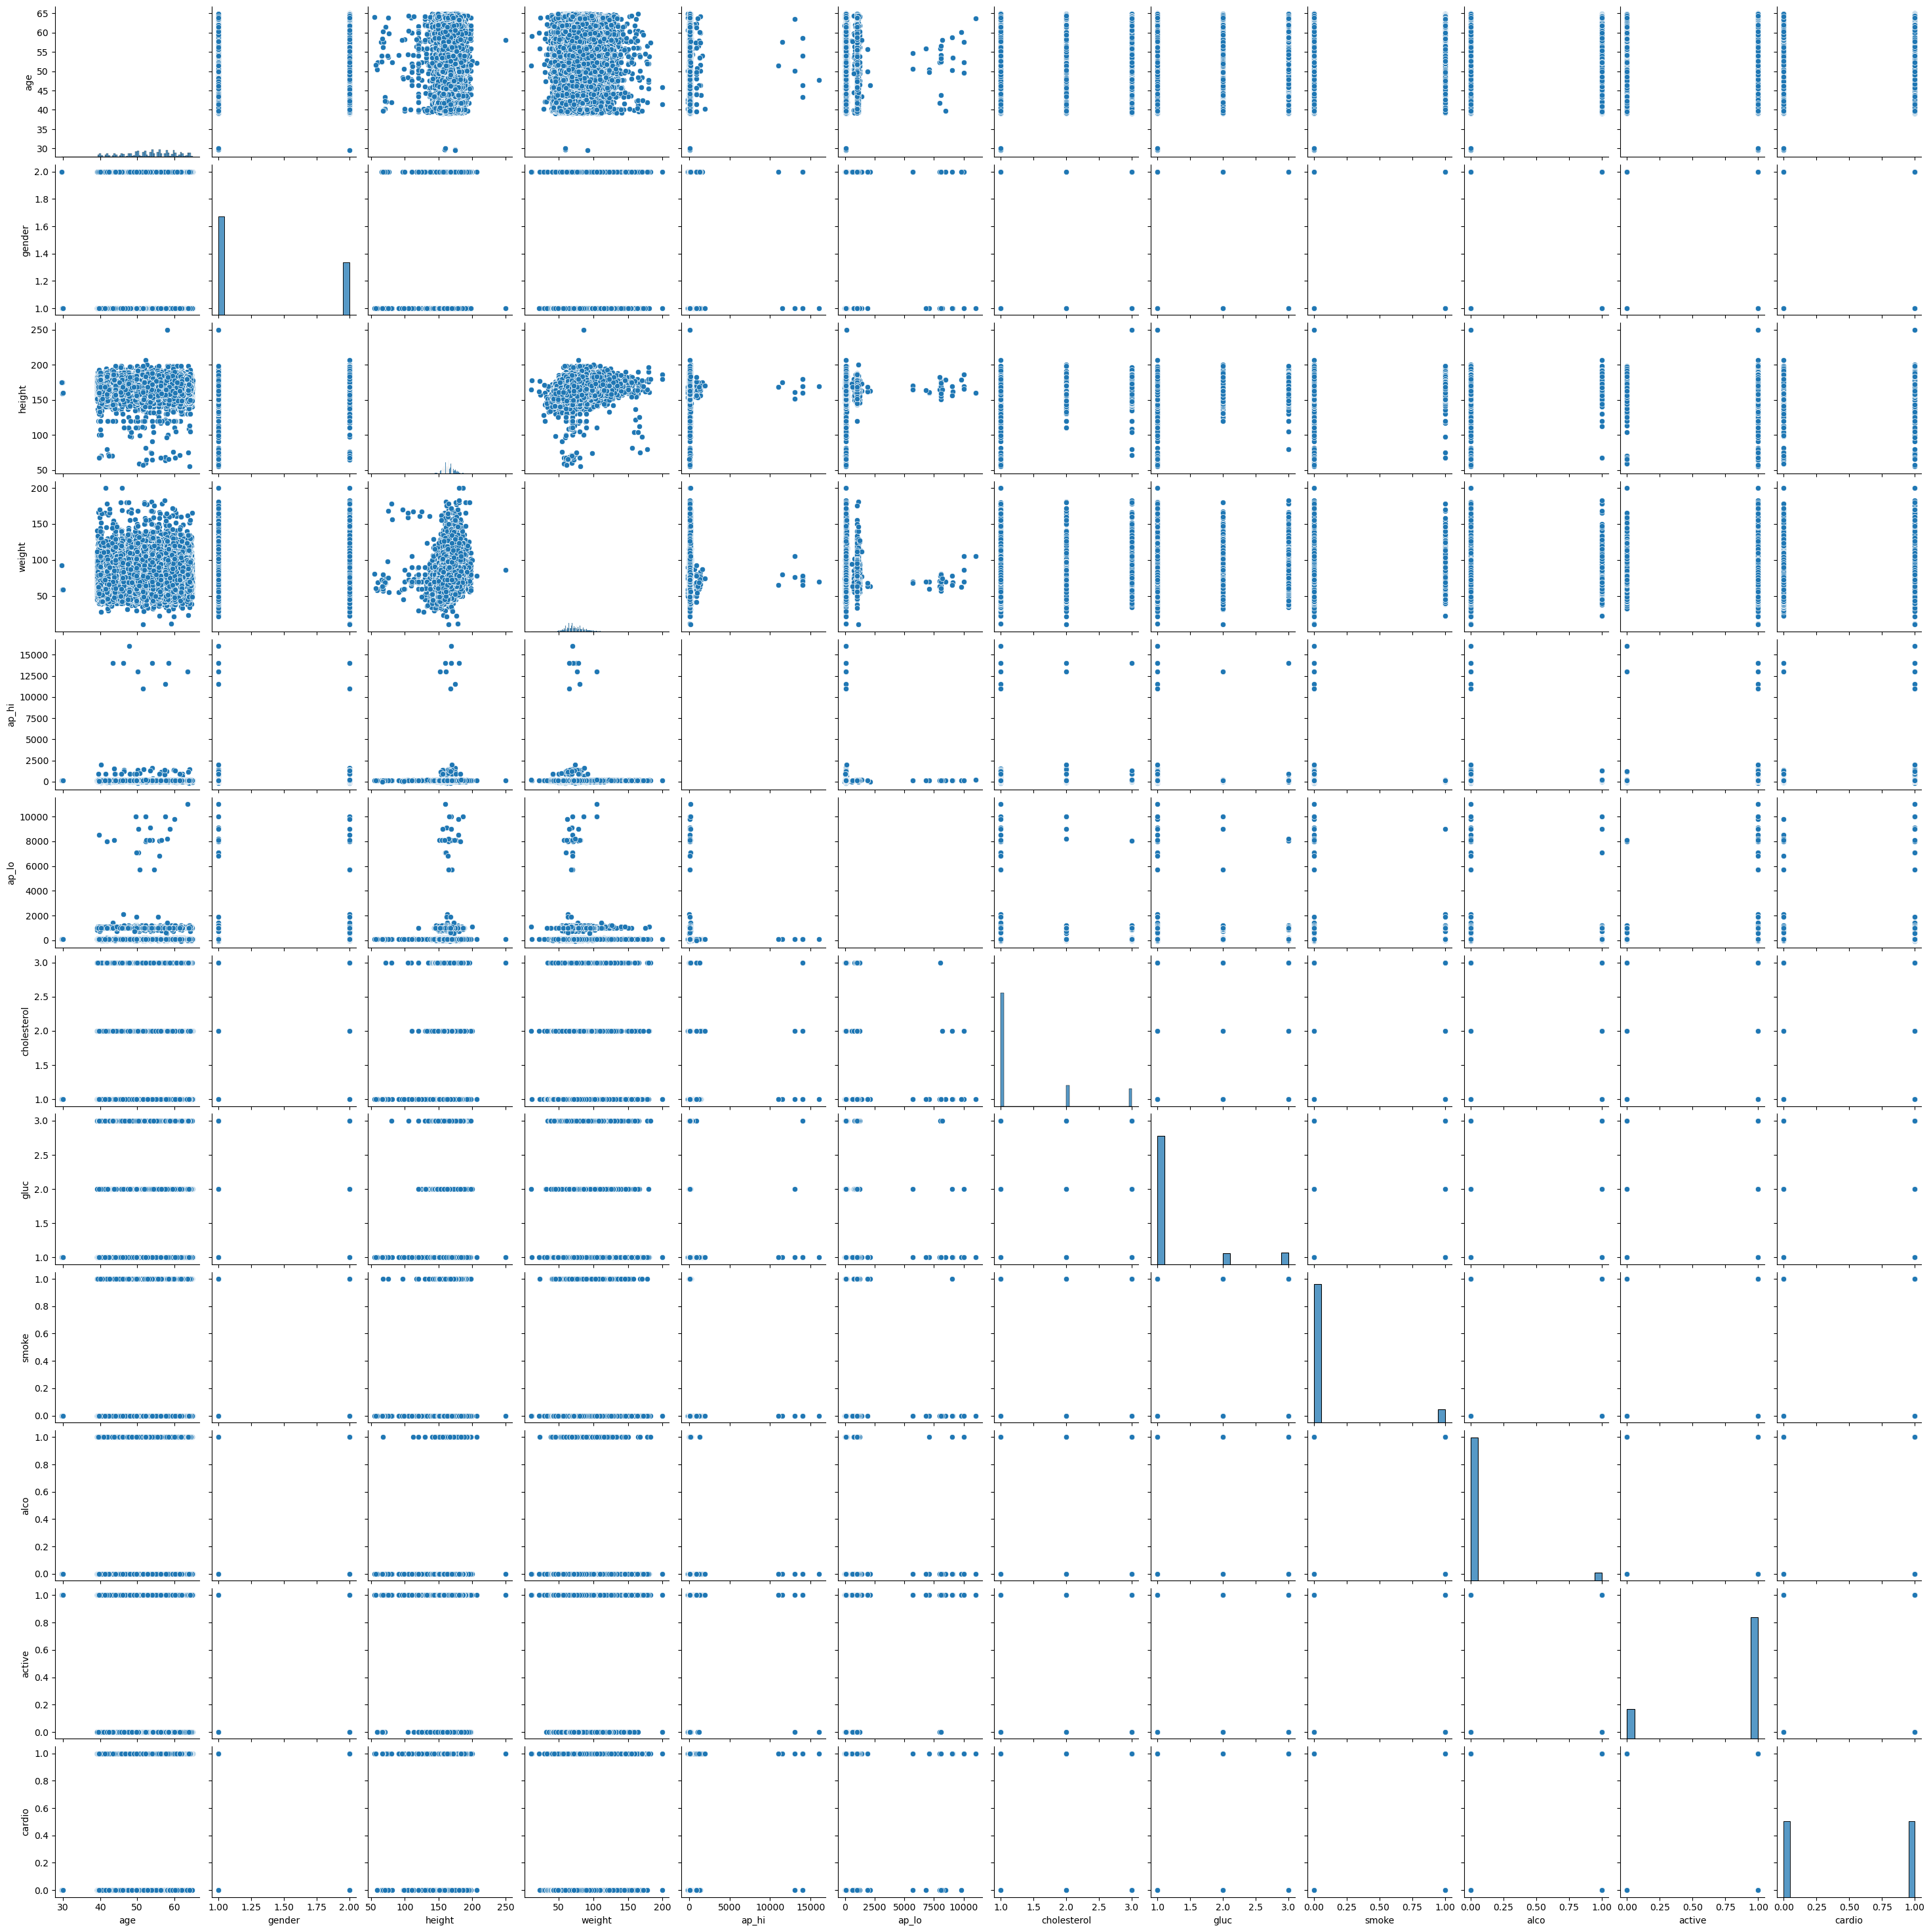

In [15]:
sns.pairplot(data = df_cardio)

## Create the training and testing data sets

In [16]:
from sklearn.model_selection import train_test_split

X = df_cardio.drop(columns = ['cardio'])
y = df_cardio['cardio']

print(X.shape, y.shape)

(70000, 11) (70000,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## Train the XGBoost model locally

In [18]:
!pip install xgboost

In [19]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
predict = model.predict(X_test)

In [21]:
predict

array([0, 0, 0, ..., 0, 0, 1])

In [22]:
predict_train = model.predict(X_train)

<Axes: >

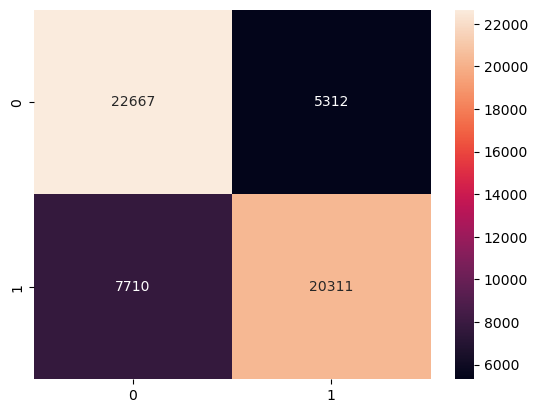

In [23]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, predict_train)

plt.figure()
sns.heatmap(cm_train, annot = True, fmt = '.0f')

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Metrics for the training set are:")
print(f"Precision score is: {precision_score(y_train, predict_train):.3f}")
print(f"Recall score is: {recall_score(y_train, predict_train):.3f}")
print(f"Accuracy score is: {accuracy_score(y_train, predict_train):.3f}")

Metrics for the training set are:
Precision score is: 0.793
Recall score is: 0.725
Accuracy score is: 0.767


In [25]:
print("Metrics for the testing set are:")
print(f"Precision score is: {precision_score(y_test, predict):.3f}")
print(f"Recall score is: {recall_score(y_test, predict):.3f}")
print(f"Accuracy score is: {accuracy_score(y_test, predict):.3f}")

Metrics for the testing set are:
Precision score is: 0.750
Recall score is: 0.701
Accuracy score is: 0.735


<Axes: >

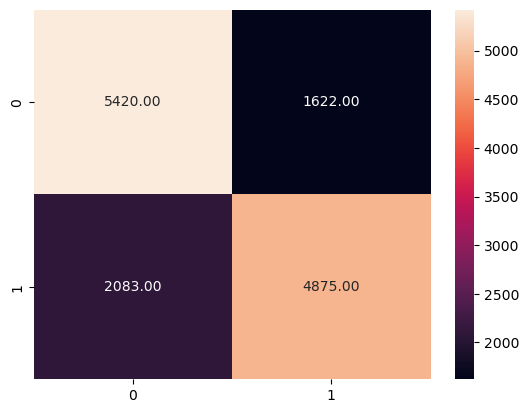

In [26]:
cm_test = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm_test, annot = True, fmt = '.2f')

## Retrain the local XGBoost with more estimators and more depth

In [34]:
model2 = XGBClassifier(eta = 0.01, max_depth = 50, n_estimators = 500)
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
predict2 = model2.predict(X_test)

In [36]:
print("Metrics for the testing set are:")
print(f"Precision score is: {precision_score(y_test, predict2):.3f}")
print(f"Recall score is: {recall_score(y_test, predict2):.3f}")
print(f"Accuracy score is: {accuracy_score(y_test, predict2):.3f}")

Metrics for the testing set are:
Precision score is: 0.705
Recall score is: 0.700
Accuracy score is: 0.705


## Dimension reduction using PCA in Sagemaker

In [37]:
import sagemaker
import boto3
from sagemaker import Session

sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket()
prefix = 'pca'

role = sagemaker.get_execution_role()
print(f"Sagemaker execution role is: {role}")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
Sagemaker execution role is: arn:aws:iam::125544413952:role/service-role/AmazonSageMaker-ExecutionRole-20231221T110148


In [39]:
import io 
import sagemaker.amazon.common as smac

buf = io.BytesIO()
df_matrix = X.to_numpy()
smac.write_numpy_to_dense_tensor(buf, df_matrix)
buf.seek(0)

0

In [40]:
import os

key = 'pca'

boto3.resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

s3_train_data = 's3://{}/{}/train/{}'.format(bucket_name, prefix, key)

print(f"Training data uploaded to: {s3_train_data}")

Training data uploaded to: s3://cardio-prediction-bucket/pca/train/pca


In [41]:
output_location = 's3://{}/{}/output'.format(bucket_name, prefix)
print(f"Training artifacts will be uploaded to: {output_location}")

Training artifacts will be uploaded to: s3://cardio-prediction-bucket/pca/output


In [45]:
from sagemaker import image_uris

container = image_uris.retrieve('pca', region = boto3.Session().region_name)

In [47]:
pca = sagemaker.estimator.Estimator(image_uri = container,
                                   role = role,
                                   instance_count = 1,
                                   instance_type = 'ml.m5.large',
                                   output_path = output_location,
                                   sagemaker_session = sagemaker_session,
                                   use_spot_instances = True,
                                   max_run = 300,
                                   max_wait = 600)

pca.set_hyperparameters(feature_dim = X.shape[1],
                       num_components = 6,
                       subtract_mean = False,
                       algorithm_mode = 'regular',
                       mini_batch_size = 100)

In [48]:
pca.fit({'train': s3_train_data})

INFO:sagemaker:Creating training-job with name: pca-2023-12-21-12-13-05-185


2023-12-21 12:13:05 Starting - Starting the training job...
2023-12-21 12:13:23 Starting - Preparing the instances for training......
2023-12-21 12:14:22 Downloading - Downloading input data...
2023-12-21 12:14:52 Downloading - Downloading the training image......
2023-12-21 12:15:58 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[12/21/2023 12:16:06 INFO 140701120739136] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[12/21/2023 12:16: